In [2]:
#the basics 
import pandas as pd
import numpy as np

import sklearn as sklearn
from pandas.tools.plotting import scatter_matrix

from scipy.stats import sem
import statsmodels.api as sm
import itertools

#visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
#settings
%matplotlib inline
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', None) #show all columns
#???????????????
sns.set(font_scale=1.5)

I analyzed the data to see the connection between flight delay and: 1) the month of flight, 2) day of month 3) day of week, 4) time of departure and arrival 5) duration of the flight, 6) the airline,


In [3]:
plt.rcParams["hist.bins"] = 1000

In [4]:
df_2015 = pd.read_csv('df_2015.csv')
df_2015.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_WAC',
       'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DIV_AIRPORT_LANDINGS', 'Unnamed: 26'],
      dtype='object')

In [5]:
# define a function to draw a random sample with 10%
# I will use this function if the sample size proves too big
def random_sample(df,frac = 0.1,seed=42):
    df = df.sample(n=None, frac=0.1, replace=False, weights=None, random_state=seed, axis=None)
    df.reset_index(inplace=True) 
    df.drop('index',inplace=True,axis=1)
    return df

In [6]:
df_2015 = random_sample(df_2015)

*Basic statistics*

In [7]:
df_2015.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_WAC,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,Unnamed: 26
0,2015,1,28,3,AA,355,12953,31703,22,13930,30977,41,1805,-9.0,1956,-25.0,0.0,NaN,171.0,733.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2015,2,24,2,EV,4865,10781,30781,72,12266,31453,74,1909,-8.0,2022,-7.0,0.0,NaN,73.0,253.0,NaN,NaN,NaN,NaN,NaN,0,NaN


In [8]:
#drop unnecessary column
#data_train.drop("Unnamed: 26",axis=1,inplace=True);

In [9]:
rows,columns = df_2015.shape
print("Rows: ", rows)
print("Columns: ", columns)

Rows:  581908
Columns:  27


In [10]:
flight_count = df_2015.shape[0]

In [11]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581908 entries, 0 to 581907
Data columns (total 27 columns):
YEAR                     581908 non-null int64
MONTH                    581908 non-null int64
DAY_OF_MONTH             581908 non-null int64
DAY_OF_WEEK              581908 non-null int64
UNIQUE_CARRIER           581908 non-null object
FL_NUM                   581908 non-null int64
ORIGIN_AIRPORT_ID        581908 non-null int64
ORIGIN_CITY_MARKET_ID    581908 non-null int64
ORIGIN_WAC               581908 non-null int64
DEST_AIRPORT_ID          581908 non-null int64
DEST_CITY_MARKET_ID      581908 non-null int64
DEST_WAC                 581908 non-null int64
CRS_DEP_TIME             581908 non-null int64
DEP_DELAY                573414 non-null float64
CRS_ARR_TIME             581908 non-null int64
ARR_DELAY                571536 non-null float64
CANCELLED                581908 non-null float64
CANCELLATION_CODE        8878 non-null object
CRS_ELAPSED_TIME         581908 non-n

In [12]:
df_2015.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_WAC,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,Unnamed: 26
count,581908.0,581908.000000,581908.000000,581908.000000,581908.000000,581908.000000,581908.000000,581908.000000,581908.000000,581908.000000,581908.000000,581908.000000,573414.000000,581908.000000,571536.000000,581908.000000,581908.000000,581908.000000,106632.000000,106632.000000,106632.000000,106632.000000,106632.000000,581908.000000,0.0
mean,2015.0,6.523884,15.714408,3.923957,2174.830862,12674.877946,31702.714615,55.586266,12672.312539,31703.283100,55.627403,1329.792423,9.399770,1494.156286,4.428085,0.015257,141.610593,821.499192,19.031989,2.817466,13.446161,0.077941,23.503226,0.003779,NaN
std,0.0,3.404546,8.775412,1.988658,1758.020438,1525.251950,1281.702481,26.512290,1524.205897,1281.803563,26.525593,483.317146,36.900187,506.716967,39.053113,0.122572,75.118212,606.481547,47.811560,18.758663,27.928070,2.174737,43.098704,0.115470,NaN
min,2015.0,1.000000,1.000000,1.000000,1.000000,10135.000000,30070.000000,1.000000,10135.000000,30070.000000,1.000000,1.000000,-42.000000,1.000000,-81.000000,0.000000,18.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2015.0,4.000000,8.000000,2.000000,733.000000,11292.000000,30615.000000,34.000000,11292.000000,30615.000000,34.000000,919.000000,-5.000000,1110.000000,-13.000000,0.000000,85.000000,373.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2015.0,7.000000,16.000000,4.000000,1687.000000,12889.000000,31453.000000,52.000000,12889.000000,31453.000000,52.000000,1325.000000,-2.000000,1520.000000,-5.000000,0.000000,123.000000,647.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.000000,NaN
75%,2015.0,9.000000,23.000000,6.000000,3232.000000,13930.000000,32467.000000,82.000000,13930.000000,32467.000000,82.000000,1730.000000,7.000000,1917.000000,8.000000,0.000000,173.000000,1061.000000,19.000000,0.000000,18.000000,0.000000,29.000000,0.000000,NaN
max,2015.0,12.000000,31.000000,7.000000,9320.000000,16218.000000,35991.000000,93.000000,16218.000000,35991.000000,93.000000,2359.000000,1649.000000,2359.000000,1636.000000,1.000000,718.000000,4983.000000,1636.000000,942.000000,748.000000,256.000000,799.000000,9.000000,NaN


In [13]:
df_2015.drop('Unnamed: 26',inplace=True,axis=1)

Rows without any data about arrival delay do not have any information on actual elapsed time. It seems that most of the flights with no arrival delay information were cancelled.  <br>  Cancellations usually happen for serious reasons. I see two 2 main ways to treat cancelled flights: 
assume a cancellation is an equivalent of being delayed for hours at a time and treating it as a delay or leaving it out from the analysis whatsoever. 

In [13]:
for col in df_2015.columns:
    null_count = df_2015[col].isnull().sum()
    if null_count > 0:
        print('Column {}: null values: {}, {} % of null values'.format(col,null_count,100*null_count/flight_count))                    

Column DEP_DELAY: null values: 8494, 1.459680911759247 % of null values
Column ARR_DELAY: null values: 10372, 1.7824123400949978 % of null values
Column CANCELLATION_CODE: null values: 573030, 98.47432927541811 % of null values
Column CARRIER_DELAY: null values: 475276, 81.67545385181162 % of null values
Column WEATHER_DELAY: null values: 475276, 81.67545385181162 % of null values
Column NAS_DELAY: null values: 475276, 81.67545385181162 % of null values
Column SECURITY_DELAY: null values: 475276, 81.67545385181162 % of null values
Column LATE_AIRCRAFT_DELAY: null values: 475276, 81.67545385181162 % of null values


Calncelled flights have no delay information.

In [21]:
print('Flights without flight delay information: {}'.format(df_2015['ARR_DELAY'].isnull().sum()))
print('Out of that: cancelled flights: {}'.format((df_2015[df_2015['ARR_DELAY'].isnull()]['CANCELLED']==1.0).sum()))
print('All cancelled flights: {}'.format((df_2015['CANCELLED']==1.0).sum()))

Flights without flight delay information: 0
Out of that: cancelled flights: 0
All cancelled flights: 0


For now, I will drop flights without any delay information.

In [22]:
df_2015=df_2015[df_2015['ARR_DELAY'].notnull()]

In [23]:
df_2015.shape

(571536, 27)

**Plots** <br>
The distribution of arrival delays exhibits skewness with a fat right tail.

I will use a 15 minute threshold to define a delay. This is in line with the standard definition and the provided data. Delay reasons are given for all flights with delays of 15 minutes or more. 

In [49]:
def select_threshold(df,threshold = 15):
    df['ARR_DELAY_{}'.format(threshold)] = (df['ARR_DELAY'] >= threshold).astype(int)

In [50]:
threshold = 15
select_threshold(df_2015,threshold = threshold)

In [51]:
print(df_2015['ARR_DELAY_15'].sum()) # number of flights with delay of 15 minutes or more
print(df_2015['CARRIER_DELAY'].notnull().sum()) # number of flights with delay reasons

106632
106632


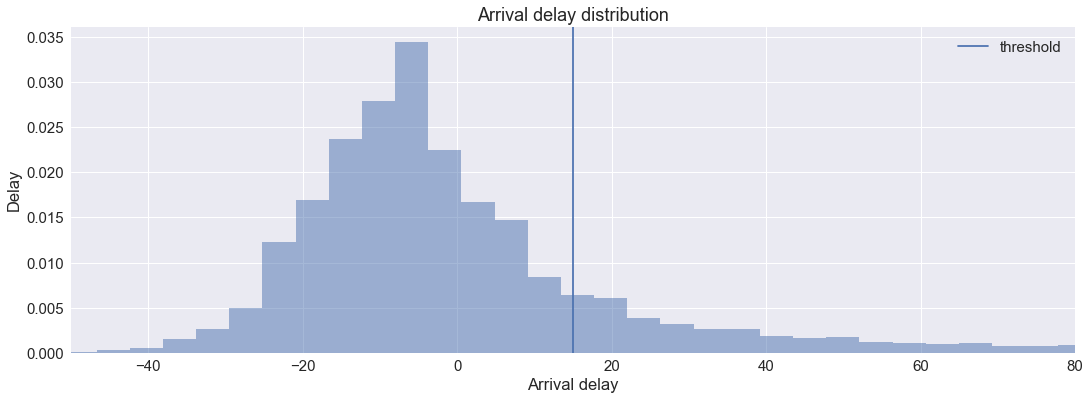

In [27]:
plt.figure(figsize=(18, 6))
plt.hist(df_2015['ARR_DELAY'],normed=1, alpha=0.5,bins=400)
plt.xlim(-50,80)
plt.axvline(threshold,label='threshold')
plt.xlabel('Arrival delay')
plt.ylabel('Delay')
plt.title('Arrival delay distribution')
plt.legend();

The distributions of arrival delay by carrier are varied. I will use UNIQUE_CARRIER as a potential explanatory variable in the model. It might be also worth it to create a different model for each airline.

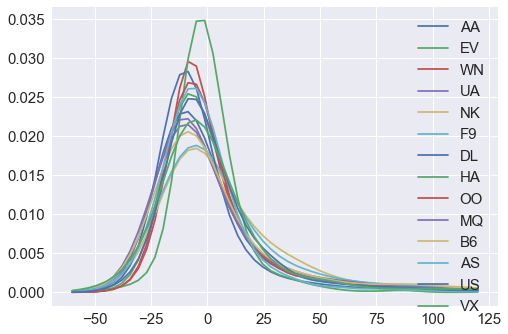

In [54]:
from scipy.stats import gaussian_kde
data_2015_sample = random_sample(df_2015,frac = 0.1,seed=42)
for carrier in df_2015['UNIQUE_CARRIER'].unique():
    data = data_2015_sample[data_2015_sample['UNIQUE_CARRIER']==carrier]['ARR_DELAY']
    density = gaussian_kde(data)
    xs = np.linspace(-60,120)
    plt.plot(xs,density(xs), label=carrier)
plt.legend()
plt.show()
    

In [21]:
to_drop=list() 
unique_values_50 = list() 
for col in df_2015.columns:
    if len(df_2015[col].unique())==1: #columns with 1 unique value
        to_drop.append(col)
    elif len(df_2015[col].unique())<50: #columns with less than 50 unique values
        unique_values_50.append(col)   
    print('Column {} has {} unique values'.format(col,len(df_2015[col].unique())))

Column YEAR has 1 unique values
Column MONTH has 12 unique values
Column DAY_OF_MONTH has 31 unique values
Column DAY_OF_WEEK has 7 unique values
Column UNIQUE_CARRIER has 14 unique values
Column FL_NUM has 6713 unique values
Column ORIGIN_AIRPORT_ID has 322 unique values
Column ORIGIN_CITY_MARKET_ID has 301 unique values
Column ORIGIN_WAC has 53 unique values
Column DEST_AIRPORT_ID has 322 unique values
Column DEST_CITY_MARKET_ID has 301 unique values
Column DEST_WAC has 53 unique values
Column CRS_DEP_TIME has 1282 unique values
Column DEP_DELAY has 694 unique values
Column CRS_ARR_TIME has 1399 unique values
Column ARR_DELAY has 732 unique values
Column CANCELLED has 2 unique values
Column CANCELLATION_CODE has 5 unique values
Column CRS_ELAPSED_TIME has 533 unique values
Column DISTANCE has 1333 unique values
Column CARRIER_DELAY has 562 unique values
Column WEATHER_DELAY has 319 unique values
Column NAS_DELAY has 367 unique values
Column SECURITY_DELAY has 76 unique values
Column 

In [23]:
print(unique_values_50)

['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'CANCELLED', 'CANCELLATION_CODE', 'DIV_AIRPORT_LANDINGS']


In [24]:
print(to_drop)

['YEAR']


In [25]:
for col in unique_values_50:
    print('Column: {}; unique values: {}'.format(col,pd.unique(df_2015[col])))

Column: MONTH; unique values: [ 1  2  3 11  5 12  8  6  9 10  4  7]
Column: DAY_OF_MONTH; unique values: [28 24  1 11  4 18 26 10 30  2 25 14 12  6 17 20 23 21 29  3  9 22 13  5 16
 15  8 27 31  7 19]
Column: DAY_OF_WEEK; unique values: [3 2 7 1 6 5 4]
Column: UNIQUE_CARRIER; unique values: ['AA' 'EV' 'WN' 'UA' 'NK' 'OO' 'F9' 'DL' 'HA' 'MQ' 'B6' 'AS' 'US' 'VX']
Column: CANCELLED; unique values: [ 0.  1.]
Column: CANCELLATION_CODE; unique values: [nan 'B' 'A' 'C' 'D']
Column: DIV_AIRPORT_LANDINGS; unique values: [0 1 9 2]


In [18]:
# drop columns with 1 unique value
#df_2015.drop(to_drop, inplace=True, axis=1)

Some of the features are leaky -  they provide information that would not have been available at the time of the booking. 
I will use some of them in exploratory analysis, but I will exclude them from the predictive model. 

In [19]:
exclude = ["CARRIER_DELAY","WEATHER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY", \
    "LATE_AIRCRAFT_DELAY", 'ACTUAL_ELAPSED_TIME','DEP_DELAY','CANCELLED'] 

In [26]:
# add names of day of week
day_of_week_names = {
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
    7: 'Monday'
}
df_2015['DAY_OF_WEEK_NAMES'] = df_2015['DAY_OF_WEEK'].apply(lambda day: day_of_week_names[day])

# add month names
month_names={
    1:  'January',
    2:  'February',
    3:  'March',
    4:  'April',
    5:  'May',
    6:  'June',
    7:  'July',
    8:  'August',
    9:  'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df_2015['MONTH_NAMES'] = df_2015['MONTH'].apply(lambda month: month_names[month])


1) Time <br>
Seasonal changes in airport traffic and weather can affect the congestion and
flow of airplanes. I expect flight volume and delays to vary throughout the year.

In [27]:
def create_group(df,col):
    return df.groupby([col,'ARR_DELAY_15'])[col].count().unstack()

The total number of flights varies by day of week and month. 

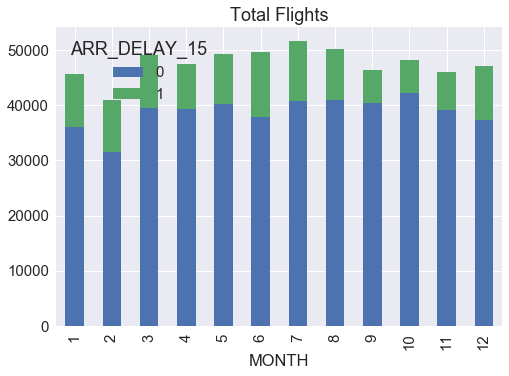

In [69]:
fig = plt.figure(figsize=(20,6))
create_group(df_2015,'MONTH').plot(kind='bar',stacked=True,title="Total Flights");

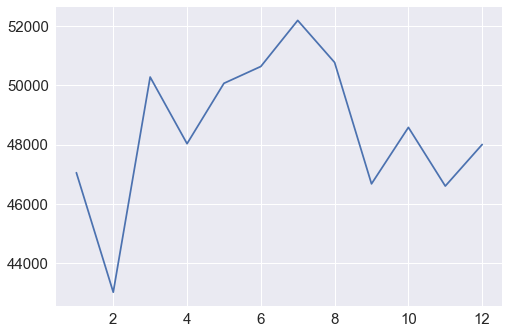

In [31]:
plt.plot(df_2015.groupby(['MONTH'])['YEAR'].count());

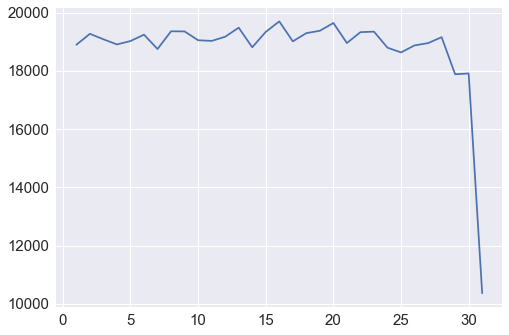

In [33]:
plt.plot(df_2015.groupby(['DAY_OF_MONTH'])['YEAR'].count());

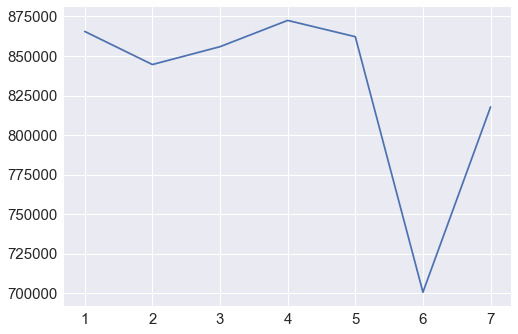

In [15]:
plt.plot(data_train.groupby(['DAY_OF_WEEK'])['YEAR'].count())

I will explore how the number of flights and delays varies throughout the year. I will highlight holidays. 

In [35]:
#pd.to_datetime(data_train[['YEAR','MONTH','DAY_OF_MONTH']].stack()).unstack()
df_2015['DATE'] = pd.to_datetime(pd.DataFrame({'year': df_2015['YEAR'],
'month': df_2015['MONTH'],
'day': df_2015['DAY_OF_MONTH']}))

In [43]:
# I downloaded a list of US bank holidays
holidays = pd.read_csv('US_bank_holidays.csv')
holidays['Date']=pd.to_datetime(holidays['Date'], format='%m/%d/%Y')
# furthermore, I market top 5 holiday based on http://traveltips.usatoday.com/busiest-travel-day-108182.html
# I also added the day before and after each holiday

In [44]:
holidays = holidays[holidays.notnull()]

In [45]:
holidays.head(2)

,Date,Holiday,Bank Holiday,Top 5 holiday
0,2015-01-01,New Year Day,TRUE,1
1,2015-01-19,Martin Luther King Jr. Day,TRUE,0


In [60]:
pct_delays_date=create_group(df_2015,'DATE')[1]/(create_group(df_2015,'DATE')[0]+create_group(df_2015,'DATE')[1])

In [59]:
df_2015.groupby('DATE')['MONTH'].count().head()

DATE
2015-01-01    1432
2015-01-02    1648
2015-01-03    1558
2015-01-04    1519
2015-01-05    1613
Name: MONTH, dtype: int64

Total number of flights throughout the year

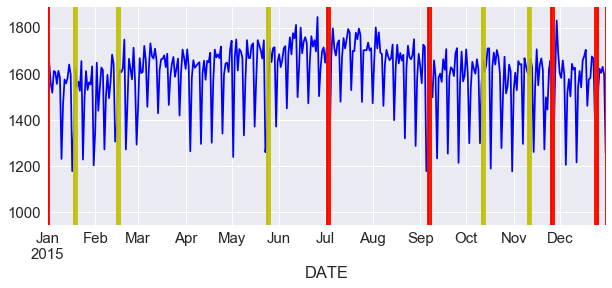

In [61]:
fig = plt.figure(figsize=(10,4))
df_2015.groupby('DATE')['MONTH'].count().plot(kind='line',c='b', label="flights")
for date in holidays['Date']:
    plt.axvline(date,c='y')
for date in holidays[holidays['Top 5 holiday']==1]['Date']:
    plt.axvline(date,c='r')

**Rolling mean**

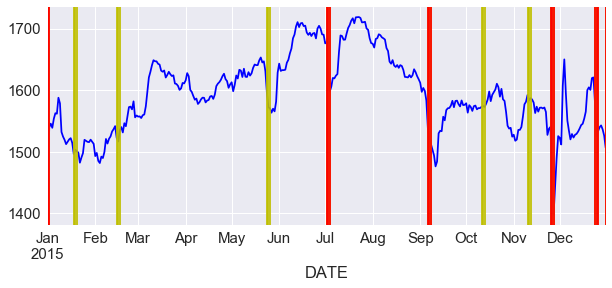

In [64]:
fig = plt.figure(figsize=(10,4))
df_2015.groupby('DATE')['MONTH'].count().rolling(window=7,min_periods=0).mean().plot(kind='line',c='b', label="rolling mean offlights")
#data_train.groupby('DATE')['ARR_DELAY_15'].sum().rolling(window=7,min_periods=0).mean().plot(kind='line',c='g', label="rolling mean offlights")
for date in holidays['Date']:
    plt.axvline(date,c='y')
for date in holidays[holidays['Top 5 holiday']==1]['Date']:
    plt.axvline(date,c='r')

Absolute number of delayed flights

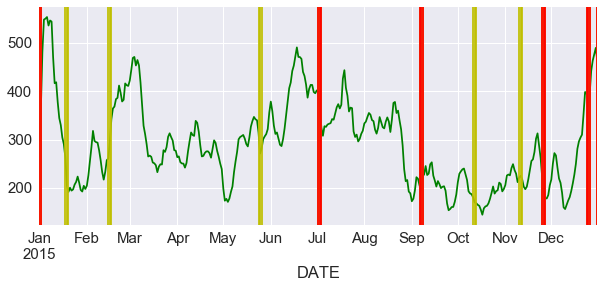

In [65]:
fig = plt.figure(figsize=(10,4))
#data_train.groupby('DATE')['MONTH'].count().rolling(window=7,min_periods=0).mean().plot(kind='line',c='b', label="rolling mean offlights")
df_2015.groupby('DATE')['ARR_DELAY_15'].sum().rolling(window=7,min_periods=0).mean().plot(kind='line',c='g', label="rolling mean offlights")
for date in holidays['Date']:
    plt.axvline(date,c='y')
for date in holidays[holidays['Top 5 holiday']==1]['Date']:
    plt.axvline(date,c='r')

% of delayed flights

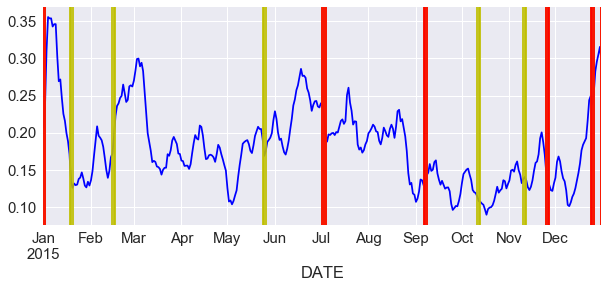

In [67]:
fig = plt.figure(figsize=(10,4))
(df_2015.groupby('DATE')['ARR_DELAY_15'].sum()/df_2015.groupby('DATE')['MONTH'].count()).rolling(window=7,min_periods=0).mean().plot(kind='line',c='b', label="rolling mean offlights")
#data_train.groupby('DATE')['ARR_DELAY_15'].sum().rolling(window=7,min_periods=0).mean().plot(kind='line',c='g', label="rolling mean offlights")
for date in holidays['Date']:
    plt.axvline(date,c='y')
for date in holidays[holidays['Top 5 holiday']==1]['Date']:
    plt.axvline(date,c='r')

**Seasonal patterns and airlines**

In [ ]:
Seasonal patterns seem to affect 

In [71]:
df_2015.groupby(['ORIGIN_AIRPORT_ID','MONTH'])['ARR_DELAY_15'].agg('mean').unstack().transpose()

ORIGIN_AIRPORT_ID,10135,10136,10140,10141,10146,10154,10155,10157,10158,10165,10170,10185,10208,10245,10257,10268,10279,10299,10333,10372,10397,10408,10423,10431,10434,10469,10529,10551,10561,10577,10581,10599,10620,10627,10631,10666,10685,10693,10713,10721,10728,10731,10732,10739,10747,10754,10779,10781,10785,10792,10800,10821,10849,10868,10874,10918,10926,10930,10980,10990,10994,11003,11013,11041,11042,11049,11057,11066,11067,11076,11092,11097,11109,11111,11122,11140,11146,11150,11193,11203,11252,11259,11267,11274,11278,11292,11298,11308,11315,11336,11337,11413,11423,11433,11447,11471,11481,11503,11525,11537,11540,11577,11587,11603,11612,11617,11618,11624,11630,11637,11638,11641,11648,11695,11697,11721,11775,11778,11823,11865,11867,11884,11898,11905,11921,11953,11973,11977,11980,11982,11986,11995,11996,11997,12003,12007,12012,12016,12094,12129,12156,12173,12177,12191,12197,12206,12217,12250,12255,12264,12265,12266,12278,12280,12320,12323,12335,12339,12343,12389,12391,12397,12402,12441,12448,12451,12478,12511,12519,12523,12758,12819,12884,12888,12889,12891,12892,12896,12898,12915,12945,12951,12953,12954,12982,12992,13029,13061,13076,13127,13158,13184,13198,13204,13230,13232,13241,13244,13256,13264,13277,13290,13296,13303,13342,13344,13360,13367,13377,13388,13422,13433,13459,13476,13485,13486,13487,13495,13502,13541,13577,13795,13796,13830,13851,13871,13873,13891,13930,13931,13933,13964,13970,14006,14025,14027,14057,14098,14100,14107,14108,14109,14113,14122,14150,14193,14222,14252,14254,14256,14262,14288,14307,14321,14457,14487,14489,14492,14520,14524,14543,14570,14574,14576,14588,14633,14635,14674,14679,14683,14685,14689,14696,14698,14709,14711,14730,14747,14771,14783,14794,14814,14828,14831,14842,14843,14869,14893,14905,14908,14952,14960,14986,15008,15016,15024,15027,15041,15048,15070,15096,15249,15295,15304,15323,15356,15370,15376,15380,15389,15401,15411,15412,15497,15582,15607,15624,15841,15897,15919,15991,16218
MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.266667,0.071429,0.176471,0.222222,0.000000,NaN,0.000000,0.111111,0.205882,1.0,0.000000,0.137931,0.529412,NaN,0.120000,0.666667,0.255319,0.084746,1.000000,0.227273,0.164561,0.333333,0.177177,0.160000,0.200000,0.379310,0.176829,0.200000,0.166667,NaN,NaN,0.170000,0.076923,0.205128,0.000000,0.153846,0.466667,0.165049,0.219780,0.223610,0.454545,0.333333,0.125000,0.250000,0.071429,0.333333,0.000000,0.268657,0.250000,0.222222,0.188571,0.225373,0.208333,0.220000,0.193548,0.200000,0.000000,0.571429,0.500000,0.200000,0.202381,0.316456,0.166667,0.315789,0.195730,0.444444,0.167035,0.210762,0.428571,0.142857,0.0,0.000000,0.196970,0.428571,0.125000,0.258621,0.111111,0.166667,0.259669,0.400000,0.000000,0.184265,0.168675,0.333333,0.170245,0.277999,0.239245,0.200000,0.000000,NaN,0.235294,0.500000,0.189873,0.235722,0.500000,0.000000,0.062500,0.181818,0.000000,0.277778,0.209790,0.272727,0.500000,0.150000,0.307692,0.000000,0.232768,0.095238,0.363636,0.244898,0.238806,0.200000,0.133333,0.357143,0.161765,0.210526,0.241935,0.148148,0.294118,0.200000,0.000000,0.170732,0.250000,0.250000,0.111111,0.125000,0.125000,0.205128,0.000000,0.204545,0.333333,0.222222,0.126984,NaN,0.400000,0.200000,0.500000,0.333333,0.266667,0.000000,0.200000,0.105128,0.000000,0.189691,0.324324,0.093750,0.150000,NaN,0.200000,0.241379,0.333333,0.198680,0.186441,0.000000,0.5,0.181818,0.000000,0.150943,0.000000,0.178571,0.085714,NaN,0.142857,0.230769,0.240000,0.185897,0.212226,0.375000,0.444444,0.160000,0.108696,0.187500,0.263158,0.000000,0.203245,0.210526,0.206694,0.234043,0.200000,0.263158,0.250000,0.297297,0.256059,0.101449,0.094737,0.191919,0.142857,0.200000,0.250000,0.000,0.195876,0.272727,0.158683,0.194211,0.161290,0.234195,0.000000,0.206

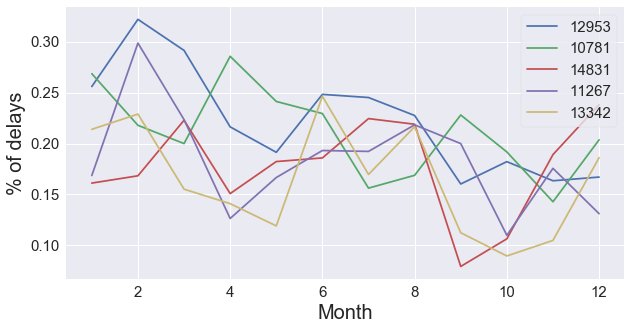

In [81]:
percent_of_delays = df_2015.groupby(['ORIGIN_AIRPORT_ID','MONTH'])['ARR_DELAY_15'].agg('mean').unstack().transpose()
plt.figure(figsize=(10,5))  
aps = df_2015['ORIGIN_AIRPORT_ID'].unique()[:5]
for i, ap in enumerate(aps):
    plt.plot(np.arange(1,13),percent_of_delays[ap])
             
plt.ylabel('% of delays', size=20)
plt.legend(loc='best',fontsize=15,frameon=True)
plt.xlabel('Month',size=20)

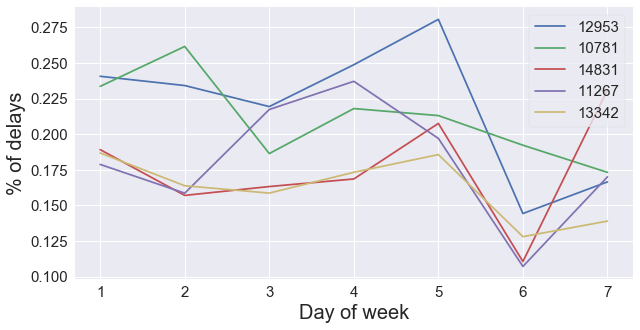

In [82]:
percent_of_delays = df_2015.groupby(['ORIGIN_AIRPORT_ID','DAY_OF_WEEK'])['ARR_DELAY_15'].agg('mean').unstack().transpose()
plt.figure(figsize=(10,5))  
aps = df_2015['ORIGIN_AIRPORT_ID'].unique()[:5]
for i, ap in enumerate(aps):
    plt.plot(np.arange(1,8),percent_of_delays[ap])
             
plt.ylabel('% of delays', size=20)
plt.legend(loc='best',fontsize=15,frameon=True)
plt.xlabel('Day of week',size=20)

In [125]:
create_group(data_train,'DAY_OF_WEEK_NAMES')

ARR_DELAY_15,0,1
DAY_OF_WEEK_NAMES,,
Friday,686194,171692
Monday,655617,146938
Saturday,687946,163441
Sunday,579430,110315
Thursday,689638,153604
Tuesday,675528,166266
Wednesday,676216,151183


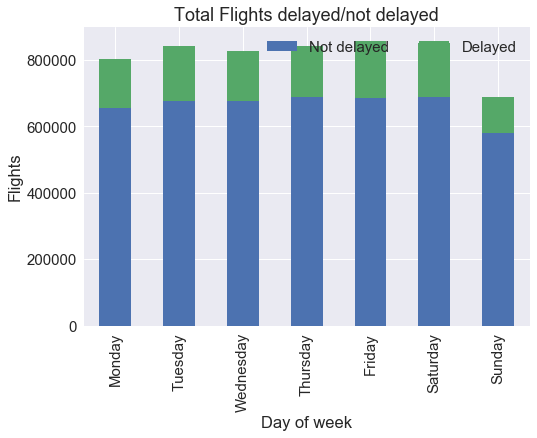

In [126]:
order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt_month = create_group(data_train,'DAY_OF_WEEK_NAMES').ix[order].plot(kind='bar',stacked=True,title="Total Flights delayed/not delayed")
plt_month.set_xlabel("Day of week")
plt_month.set_ylabel("Flights")
plt_month.legend(["Not delayed","Delayed"], loc=0,ncol=10);

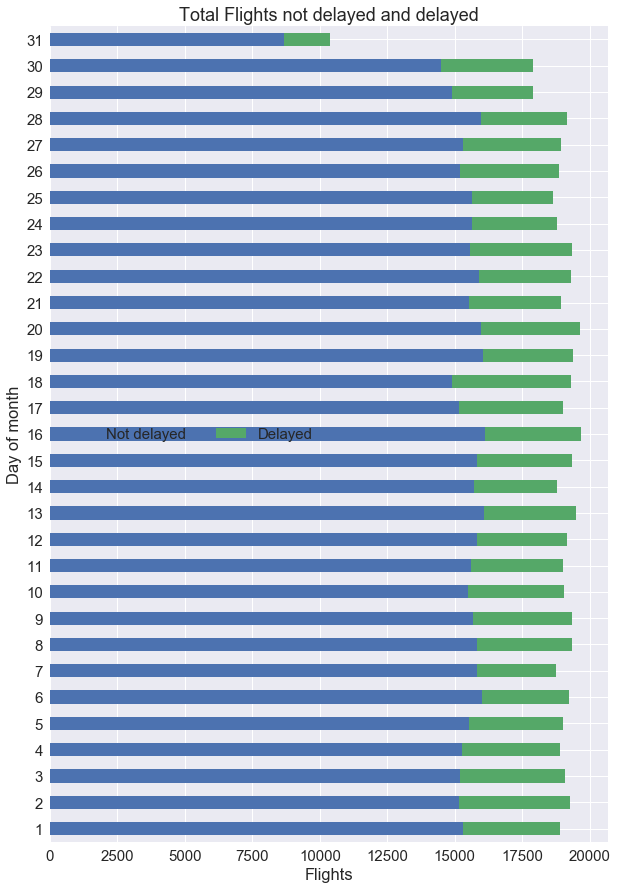

In [89]:
plt = create_group(df_2015,'DAY_OF_MONTH').plot(kind='barh',stacked=True,title="Total Flights not delayed and delayed",figsize=(10, 15))
plt.set_xlabel("Flights")
plt.set_ylabel("Day of month")
plt.legend(["Not delayed","Delayed"], loc=0,ncol=10);

Plotting the number of delayed flights as a share of nondelayed flights: there is a cyclical pattern which I would attribute to the weekly cycle (the difference between the peaks below is 7 days)

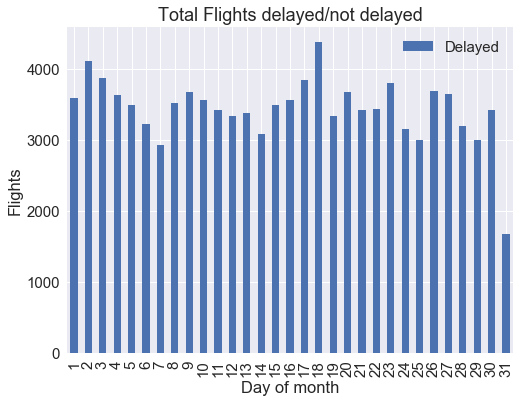

In [96]:
plt_month = create_group(df_2015,'DAY_OF_MONTH')[1].plot(kind='bar',stacked=True,title="Total Flights delayed/not delayed",figsize=(8, 6))
plt_month.set_xlabel("Day of month")
plt_month.set_ylabel("Flights")
plt_month.legend(["Delayed"], loc=0,ncol=10);

The amount of flight traffic also varies over the course of the week, in particular around
the weekend, with there being more domestic flights on Fridays <br>
flights are most delayed right before the weekend 

C:\Users\micakova\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


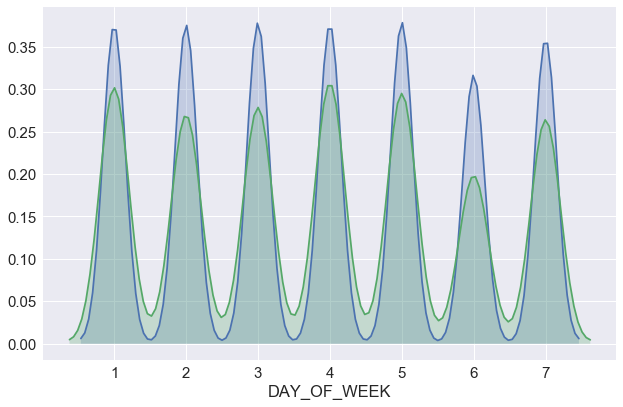

In [100]:
fg = sns.FacetGrid(df_2015, hue='ARR_DELAY_15', aspect=1.5, size=6)
fg.map(sns.kdeplot, 'DAY_OF_WEEK', shade=True);

**Types of delay by day of week**

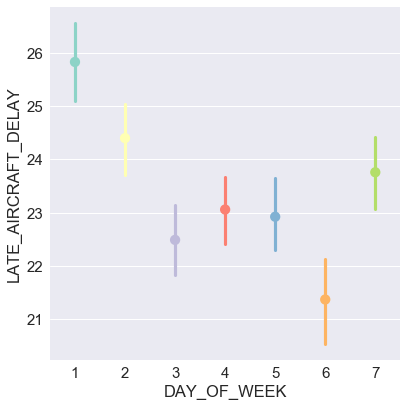

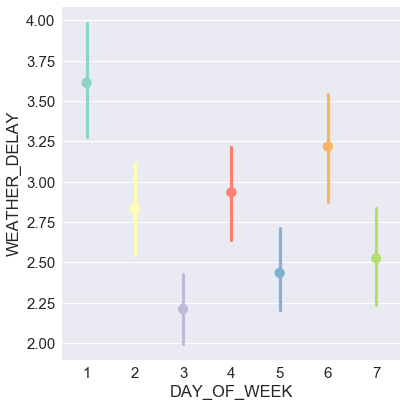

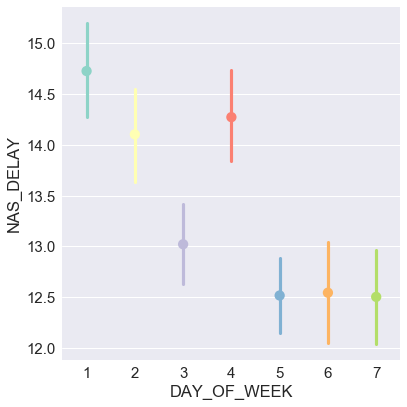

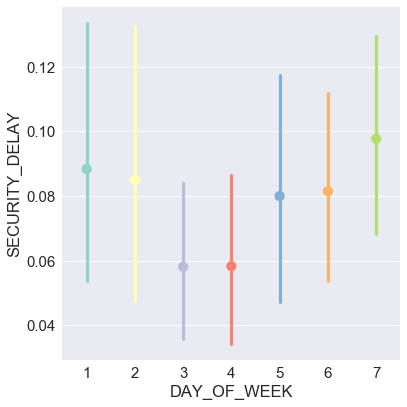

In [107]:
sns.factorplot(x='DAY_OF_WEEK', y="LATE_AIRCRAFT_DELAY", data=df_2015, split=True, size=6, palette="Set3")
sns.factorplot(x='DAY_OF_WEEK', y="WEATHER_DELAY", data=df_2015, split=True, size=6, palette="Set3")
sns.factorplot(x='DAY_OF_WEEK', y='NAS_DELAY', data=df_2015, split=True, size=6, palette="Set3")
sns.factorplot(x='DAY_OF_WEEK', y='SECURITY_DELAY', data=df_2015, split=True, size=6, palette="Set3")

In [ ]:
#bar chart with error bars
ax = sns.factorplot(x='TotalFamily', y='Survived', data=train, kind='bar', aspect=1.5, size=6, palette="Greens")
ax.set(ylabel='Percent of Passengers')
plt.title('Survival by Total Family Size (not including self)');

3) Departure time

Scheduled departure time would also relate to delay, not
only due to traffic, but due to domino effect.

Early morning flights are the least delayed and the likelihood of delay increases with time.

C:\Users\micakova\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


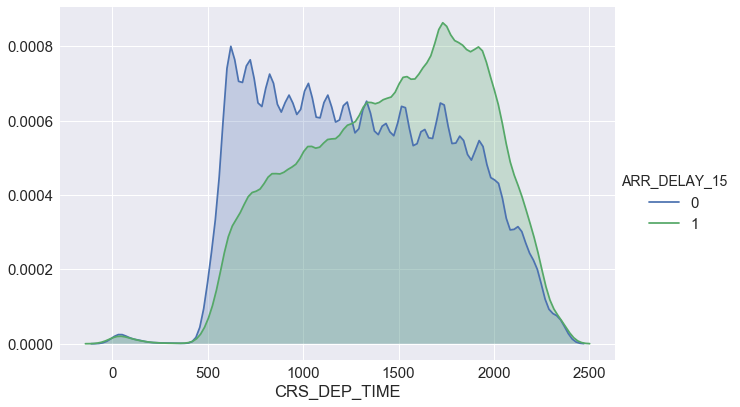

In [113]:
fg = sns.FacetGrid(df_2015, hue='ARR_DELAY_15', aspect=1.5, size=6)
fg.map(sns.kdeplot, 'CRS_DEP_TIME', shade=True)
fg.add_legend();

4) flight duration

domestic flights less
than 6 hours long average only about 10 minutes of delay, longer flights have longer delays <br>

The average delay as a function of flight duration is very nonlinear

In [143]:
group_by_duration=create_group(df_2015,'CRS_ELAPSED_TIME')

In [151]:
group_by_duration.dropna(inplace=True)

In [153]:
group_by_duration_grp = group_by_duration[1]/group_by_duration[0][(group_by_duration[1]/group_by_duration[0])<1]

The higher the CRS elapsed time, the higher the variation in the chance of delay.

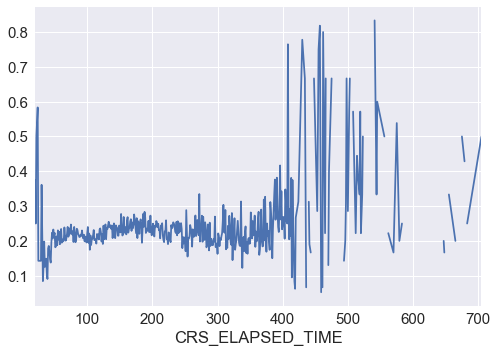

In [154]:
group_by_duration_grp.plot()

C:\Users\micakova\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


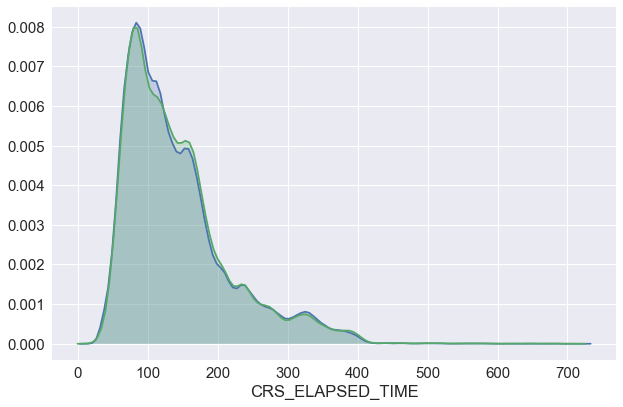

In [132]:
fg = sns.FacetGrid(df_2015, hue='ARR_DELAY_15', aspect=1.5, size=6)
fg.map(sns.kdeplot, 'CRS_ELAPSED_TIME', shade=True)

5) Airlines and airports


In [159]:
df_2015.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_WAC',
       'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DIV_AIRPORT_LANDINGS', 'DAY_OF_WEEK_NAMES', 'MONTH_NAMES', 'DATE',
       'ARR_DELAY_15'],
      dtype='object')

In [174]:
trip_counts_df = df_2015[['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'ARR_DELAY_15']].groupby(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']).count()
delay_counts_df = df_2015[['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'ARR_DELAY_15']].groupby(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']).sum()
delay_counts_df = delay_counts_df.rename_axis({'ARR_DELAY_15' : 'DELAY COUNTS'}, axis=1)
trip_counts_df = trip_counts_df.rename_axis({'ARR_DELAY_15' : 'FLIGHT COUNTS'}, axis=1)
#mat = (delay_counts_df / trip_counts_df).unstack().T.reset_index(level=0, drop=True).T

In [175]:
delay_counts_df.fillna(0,inplace=True)
trip_counts_df.fillna(0,inplace=True)

In [191]:
no_of_flights_by_airline = pd.DataFrame({'no_of_flights' : df_2015.groupby(['UNIQUE_CARRIER'])['FL_NUM'].count().sort_values(ascending=False)})
no_of_flights_by_airline['share_of_flights'] = no_of_flights_by_airline['no_of_flights']/no_of_flights_by_airline['no_of_flights'].sum()

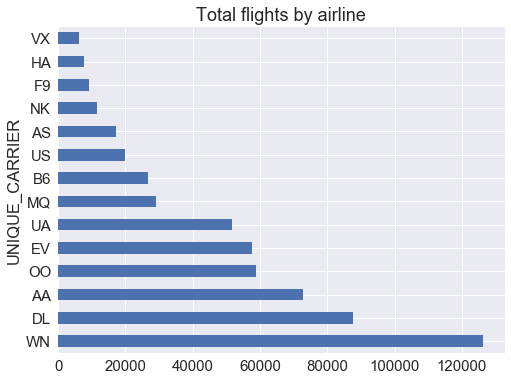

In [193]:
no_of_flights_by_airline['no_of_flights'].plot(kind='barh',stacked=True,title="Total flights by airline",figsize=(8, 6))

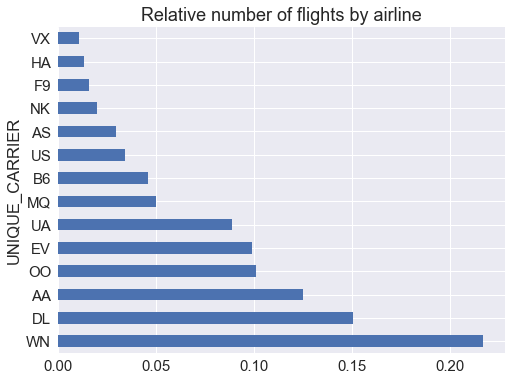

In [194]:
no_of_flights_by_airline['share_of_flights'].plot(kind='barh',stacked=True,title="Relative number of flights by airline",figsize=(8, 6))

In [198]:
no_of_flights_by_airline['delayed_flight_count'] = df_2015.groupby(['UNIQUE_CARRIER'])['ARR_DELAY_15'].sum()

In [199]:
no_of_flights_by_airline.head()

,no_of_flights,share_of_flights,delayed_flight_count
UNIQUE_CARRIER,,,
WN,126379,0.217180,23631
DL,87659,0.150641,11805
AA,72655,0.124857,13218
OO,58821,0.101083,11006
EV,57586,0.098961,11097


In [200]:
no_of_flights_by_airline['delayed_flight_share'] = no_of_flights_by_airline['delayed_flight_count']/no_of_flights_by_airline['no_of_flights']

In [202]:
no_of_flights_by_airline.head(2)

,no_of_flights,share_of_flights,delayed_flight_count,delayed_flight_share
UNIQUE_CARRIER,,,,
WN,126379,0.217180,23631,0.186985
DL,87659,0.150641,11805,0.134670


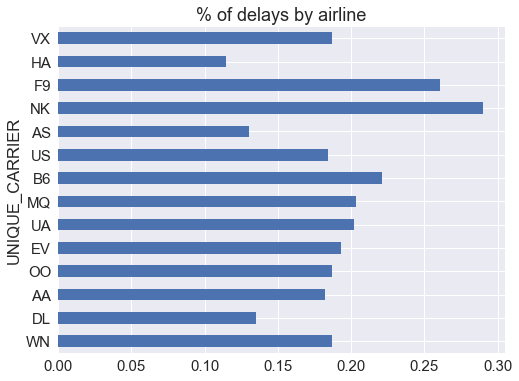

In [203]:
no_of_flights_by_airline['delayed_flight_share'].plot(kind='barh',stacked=True,title="% of delays by airline",figsize=(8, 6))

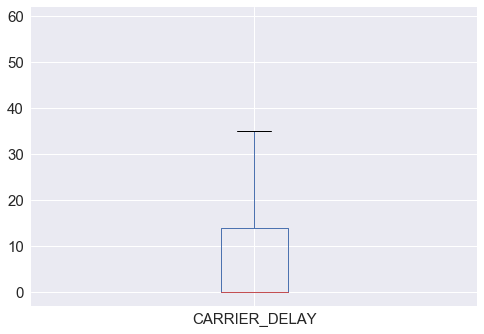

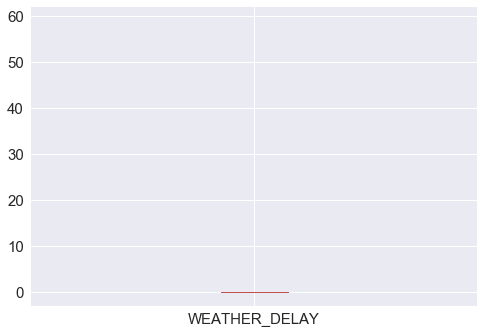

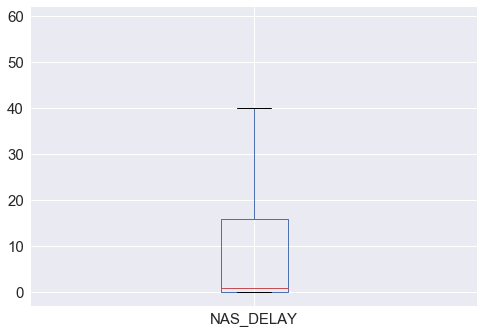

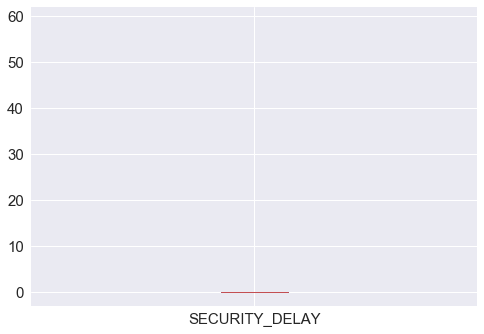

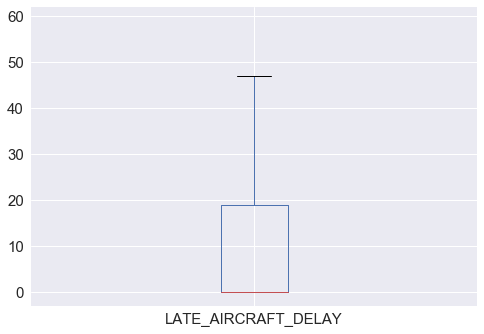

In [210]:
delay_causes = [x for x in df_2015.columns if 'DELAY' in x][2:-1]
for delay_cause in delay_causes:
    df_2015[df_2015[delay_cause]<60][[delay_cause]].plot.box()

In [216]:
no_of_flights_by_airline['no_of_delays'] = df_2015.groupby(['UNIQUE_CARRIER'])['ARR_DELAY_15'].sum().sort_values(ascending=False)

In [217]:
no_of_flights_by_airline['delays/flights']= no_of_flights_by_airline['no_of_delays']/no_of_flights_by_airline['no_of_flights']

In [218]:
no_of_flights_by_airline['no_of_nondelayed_flights'] = no_of_flights_by_airline['no_of_flights'] - no_of_flights_by_airline['no_of_delays'] 

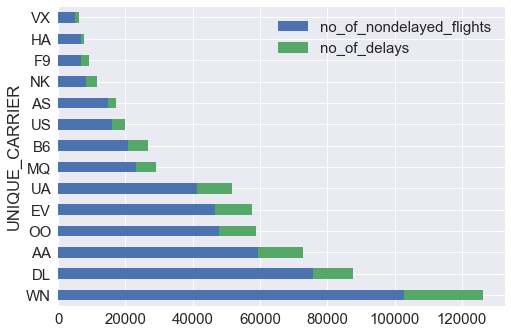

In [219]:
no_of_flights_by_airline[['no_of_nondelayed_flights','no_of_delays']].plot.barh(stacked=True)

In [127]:
top_5_airlines = ['WN','DL','AA','OO','EV']

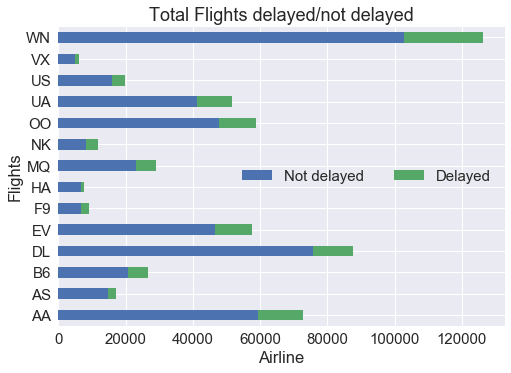

In [213]:
plt = create_group(df_2015,'UNIQUE_CARRIER').plot(kind='barh',stacked=True,title="Total Flights delayed/not delayed")
plt.set_xlabel("Airline")
plt.set_ylabel("Flights")
plt.legend(["Not delayed","Delayed"], loc=0,ncol=10);

In [221]:
no_of_flights_by_airline

,no_of_flights,share_of_flights,delayed_flight_count,delayed_flight_share,no_of_delays,delays/flights,no_of_nondelayed_flights
UNIQUE_CARRIER,,,,,,,
WN,126379,0.217180,23631,0.186985,23631,0.186985,102748
DL,87659,0.150641,11805,0.134670,11805,0.134670,75854
AA,72655,0.124857,13218,0.181928,13218,0.181928,59437
OO,58821,0.101083,11006,0.187110,11006,0.187110,47815
EV,57586,0.098961,11097,0.192703,11097,0.192703,46489
UA,51675,0.088803,10428,0.201800,10428,0.201800,41247
MQ,29168,0.050125,5930,0.203305,5930,0.203305,23238
B6,26694,0.045873,5901,0.221061,5901,0.221061,20793
US,19720,0.033889,3629,0.184026,3629,0.184026,16091


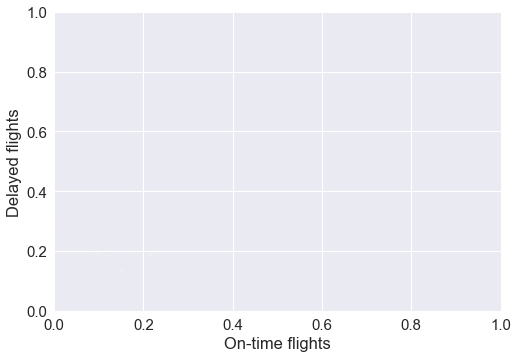

In [233]:
from pylab import *
from scipy import *

x = no_of_flights_by_airline['share_of_flights']
y = no_of_flights_by_airline['delayed_flight_share']
area = no_of_flights_by_airline['no_of_flights']/no_of_flights_by_airline['no_of_flights'].sum()


# making the scatter plot
sct = scatter(x, y,  s=area, linewidths=2, edgecolor='w')
sct.set_alpha(0.75)

axis([0,1,0,1])
xlabel('On-time flights')
ylabel('Delayed flights')
show()

In [ ]:
from pylab import *
from scipy import *

x = no_of_flights_by_airline['share_of_flights']
y = no_of_flights_by_airline['delayed_flight_share']
area = no_of_flights_by_airline['no_of_flights']/no_of_flights_by_airline['no_of_flights'].sum()


# making the scatter plot
#sct = scatter(x, y,  linewidths=2, edgecolor='w')
sct = scatter(x, y,  s=area, linewidths=2, edgecolor='w')
sct.set_alpha(0.75)

axis([0,1,0,1])
xlabel('On-time flights')
ylabel('Delayed flights')
show()